In [81]:
import shapely as sy
import numpy as np

# Testig different Geometric Objects

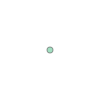

In [4]:
sy.Point([0, 1, 2])

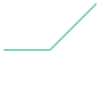

In [57]:
sy.LineString([[0, 1], [1, 1], [2, 2]])

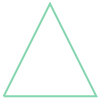

In [22]:
sy.LinearRing([[0, 0], [0.5, 1], [1, 0]]) # Area is zero because this is not the polygon but just some kind of boundary object.

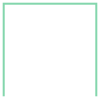

In [90]:
sy.LineString([[0, 0], [0, 1], [1, 1], [1, 0]])

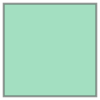

In [23]:
sy.Polygon(shell=[[0, 0], [0, 1], [1, 1], [1, 0]]) # Regular polygon

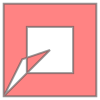

In [30]:
sy.Polygon(shell=[[0, 0], [0, 1], [1, 1], [1, 0]], 
           holes=[[[0.25, 0.25], [0.25, 0.75], [0.75, 0.75], [0.75, 0.25]], 
                  [[0.2, 0.4], [0.5, 0.5], [0, 0]]]) # This is an example of invalid Polygon, as it has inner rings which itersect each other.

# Testing Collections

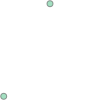

In [32]:
point_collection = sy.MultiPoint([sy.Point(0, 0), sy.Point(0.5, 1)])
point_collection

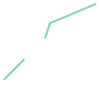

In [37]:
lines_collection = sy.MultiLineString([sy.LineString([[0, 0], [1, 1], [2, 2]]), sy.LineString([[4, 4], [4.5, 5.5], [9.0, 7.4]])])
lines_collection

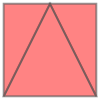

In [43]:
polygon_collection = sy.MultiPolygon([
        sy.Polygon(shell=[[0, 0], [0.5, 1], [1, 0]]), 
        sy.Polygon(shell=[[0, 1], [0.5, 1], [0, 0]]),
        sy.Polygon(shell=[[1, 1], [0.5, 1], [1, 0]])
    ])
polygon_collection

# Linear Referencing methods

## Interpolating

What this method actually does, is it goes along the LineString or LinearRing and measures walked distance. Then it returns point on which measured distance will be equal distance that was specified by the user. 

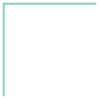

In [63]:
referenced = sy.LineString([[0, 0], [0, 1], [1, 1]])
referenced

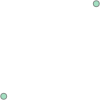

In [72]:
referenced.boundary

In [70]:
point = referenced.interpolate(0.5)
list(point.coords)

[(0.0, 0.5)]

## Projecting

With this method you can find the nearest distance between along the boundary object of the Geometry of one object and boundary object of the other.

<img src='./misc/projection_example.jpg'/>

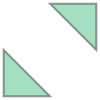

In [75]:
polygon_1 = sy.Polygon(shell=[[0, 0], [0, 0.5], [0.5, 0]])
polygon_2 = sy.Polygon(shell=[[1, 1], [1, 0.5], [0.5, 1]])

sy.MultiPolygon([polygon_1, polygon_2])

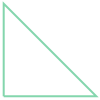

In [79]:
polygon_1.boundary

In [98]:
# Nearest distance between them

polygon_1.boundary.project(other=sy.Point(0.3, 0.3))

0.8535533905932737

In [87]:
np.sqrt(0.5 ** 2 + 0.5 ** 2) / 2

0.3535533905932738

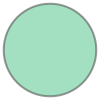

In [102]:
polygon = sy.Point(0, 0).buffer(2.0)
polygon

In [ ]:
polygon.area